In [1]:
import numpy as np 
from numpy import genfromtxt 
import matplotlib.pyplot as plt 

In [3]:
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

In [16]:
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

# Normalize input data by using mean normalizaton
def mean_normalization(X):
  N = len(X)
  maxi = np.max(X)
  mini = np.min(X)
  avg = np.mean(X)
  X = (X-avg) / (maxi-mini)
  X_b = np.c_[np.ones((N, 1)), X]
  return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

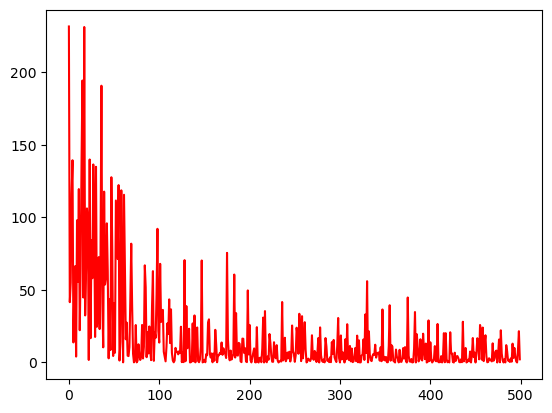

In [30]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):

    # khởi tạo giá trị tham số
    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas] # chuyển thành array
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i 

            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # tính output
            oi = xi.dot(thetas)

            # tính loss li
            li = (oi - yi)*(oi - yi) / 2

            # tính gradient cho loss
            g_li = (oi - yi)

            # tính gradient
            gradients = xi.T.dot(g_li)

            # update giá trị theta
            thetas = thetas - learning_rate*gradients

            # logging
            thetas_path.append(thetas)
            losses.append(li[0][0])

    return thetas_path, losses

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01 )

x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()

In [13]:
X_b = np.c_[np.ones((N, 1)), X]
X_b.shape

(200, 4)

In [31]:
#Question 12
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01 )
print(round(np.sum(losses),2))

6754.64


In [32]:
print(np.random.permutation(N).tolist())

[77, 174, 47, 138, 53, 50, 23, 185, 108, 199, 43, 79, 119, 85, 63, 44, 19, 127, 150, 156, 20, 115, 94, 113, 103, 48, 194, 197, 177, 157, 51, 78, 33, 125, 139, 105, 146, 40, 118, 89, 159, 14, 187, 59, 36, 133, 60, 155, 181, 151, 145, 191, 73, 58, 126, 120, 158, 25, 27, 31, 175, 106, 122, 32, 9, 143, 75, 109, 88, 93, 81, 131, 80, 184, 49, 104, 148, 114, 195, 13, 87, 16, 124, 172, 179, 188, 84, 173, 101, 29, 35, 192, 161, 74, 121, 163, 11, 72, 37, 99, 64, 65, 86, 142, 24, 196, 152, 112, 41, 39, 17, 160, 4, 1, 8, 183, 162, 67, 30, 69, 83, 5, 92, 128, 136, 141, 3, 116, 96, 102, 76, 186, 190, 107, 6, 54, 147, 56, 144, 100, 21, 171, 111, 129, 62, 0, 137, 182, 140, 52, 110, 95, 117, 134, 176, 57, 170, 55, 22, 71, 38, 167, 18, 153, 165, 82, 97, 46, 28, 132, 154, 66, 2, 91, 169, 10, 42, 189, 130, 61, 70, 98, 149, 135, 45, 198, 68, 166, 12, 164, 168, 7, 123, 34, 26, 90, 178, 15, 180, 193]


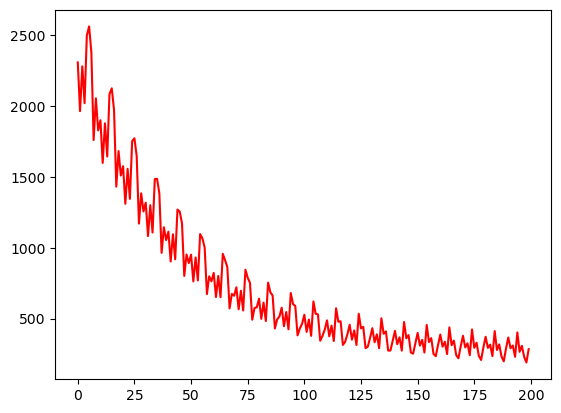

In [33]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01):

    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application

        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])


        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # tính output
            output = xi.dot(thetas)

            # tính loss
            loss = ((output - yi)**2)/2

            # tính đạo hàm cho loss
            loss_grd = (output - yi)/minibatch_size

            # tính đạo hàm cho các tham số
            gradients = xi.T.dot(loss_grd)

            # cập nhật tham số
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()

In [34]:
#question 13
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01)
print(round(sum(losses),2))

224856.46


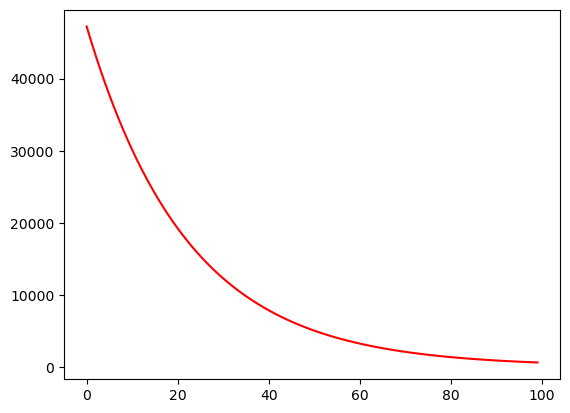

In [28]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):

    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for i in range(n_epochs):
        # tính output
        output = X_b.dot(thetas)

        # tính loss
        loss = (output - y)**2

        # tính đạo hàm cho loss
        loss_grd = 2*(output - y)/N

        # tính đạo hàm cho các tham số
        gradients = X_b.T.dot(loss_grd)

        # cập nhật tham số
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)

        mean_loss = np.sum(loss)/N
        losses.append(mean_loss)

    return thetas_path, losses

bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

# in loss cho 100 sample đầu
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()

In [38]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
print(round(sum(losses),2))

1069563.04
